# ADS Thesis Project - Quantile Regression 

**Authors: Marion Späth (2772981)**


This notebook documents the Random Forest for both cattle and goat herders.
The datasets have been created in the R file for the Elastic Net.

In [3]:
#!pip install shap
#!pip install lightgbm 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import os
import pickle
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None) # show all columns in output

# set working directory
os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data')

# load train and test data (previously created in the ElasticNet notebook)
train_cattle = pd.read_csv("train_cattle_df.csv")
test_cattle = pd.read_csv("test_cattle_df.csv")
test_cattle.head(2)

,id,wave,afm_language,age_constant,agric_land,amh_language,educ_recoded_constant,educ_recoded_constant_num,eng_language,expend,irrigated_land_bin,cs_cs_diff_post_cattle,cs_cs_ratio_post_cattle,number_minors,educ_child_recoded,educ_child_recodedNUMERIC,activity_child_recoded,household_description,number_adults,main_info_source_recoded,religion_recoded,owns_phone,household_moved,why_not_purchase_recoded,know_vip,trust_vip,age_constant_z,number_adults_z,number_minors_z,educ_child_z,educ_adult_z,cs_diff_log,resid_mixed
0,1,4,No,25,Yes,No,Never attended,1,No,0,1,-188.170624,0.0,2,Never attended school,0,Working with Livestock,Fully settled: The whole of the household (all...,2,Interpersonal Sources,Traditional/Wakefata,0,No,Lack of Awareness or Understanding,Yes,Yes,-1.098058,-0.213343,-0.774825,-0.892525,-0.476155,5.242649,-0.429083
1,26,4,No,35,No,No,Never attended,1,No,0,0,-571.529175,0.0,3,Elementary,5,Student,Fully settled: The whole of the household (all...,2,Professional and Organizational Sources,Traditional/Wakefata,0,No,"Financial, Practical, and Situational Constraints",Yes,Yes,-0.496108,-0.213343,-0.159894,0.413594,-0.476155,6.350064,0.659505


In [5]:
# Prepare categorical variables but creating dummies
train_cattle = pd.get_dummies(train_cattle, drop_first='True')
test_cattle = pd.get_dummies(test_cattle, drop_first='True')

# Prepare X and Y training sets for models
X_cattle = train_cattle.copy
X_cattle = train_cattle.drop(["resid_mixed", "id", "wave", "cs_cs_diff_post_cattle", "cs_cs_ratio_post_cattle", "educ_recoded_constant_num", "educ_child_recodedNUMERIC", "number_adults", 
                              "number_minors", "age_constant", "educ_child_z", "educ_adult_z", "cs_diff_log"], axis=1)

Y_cattle = train_cattle["resid_mixed"]

X_cattle_TEST = test_cattle.copy
X_cattle_TEST = test_cattle.drop(["resid_mixed", "id", "wave", "cs_cs_diff_post_cattle", "cs_cs_ratio_post_cattle", "educ_recoded_constant_num", "educ_child_recodedNUMERIC", "number_adults",
                                   "number_minors", "age_constant", "educ_child_z", "educ_adult_z", "cs_diff_log"], axis=1)

Y_cattle_TEST = test_cattle["resid_mixed"]

In [6]:
# Add intercept manually (statsmodels does not do it by default)
X_qr = sm.add_constant(X_cattle)

# Choose quantile (e.g., 0.5 for median)
quantile = 0.5

# Fit quantile regression model
model = sm.QuantReg(Y_cattle, X_qr)
res = model.fit(q=quantile)

# View summary
print(res.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [12]:
X_cattle = X_cattle.astype(float)          # <- ensure numeric
X_cattle.head(2)

,expend,irrigated_land_bin,owns_phone,age_constant_z,number_adults_z,number_minors_z,afm_language_Yes,agric_land_Yes,amh_language_Yes,educ_recoded_constant_Elementary,educ_recoded_constant_Never attended,educ_recoded_constant_Nursery,educ_recoded_constant_Secondary and Higher,eng_language_Yes,educ_child_recoded_Never attended school,educ_child_recoded_Other,educ_child_recoded_Secondary,activity_child_recoded_Not working,activity_child_recoded_Student,activity_child_recoded_Working,activity_child_recoded_Working with Livestock,household_description_Not settled: The whole household moves around in order to herd the animals,household_description_Partially settled: Some members of the household are permanently settled and others move around in order to herd their animals,"main_info_source_recoded_Media, Community-Based, and Survey Sources",main_info_source_recoded_Professional and Organizational Sources,religion_recoded_Muslim,religion_recoded_Traditional/Wakefata,household_moved_Yes,why_not_purchase_recoded_Distrust or Negative Perception,"why_not_purchase_recoded_Financial, Practical, and Situational Constraints",why_not_purchase_recoded_Lack of Awareness or Understanding,know_vip_Yes,trust_vip_Yes
0,0.0,0.0,0.0,-0.977668,-0.213343,-0.774825,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,-0.857278,-0.213343,-0.774825,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [33]:
# Quantiles to estimate
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Add constant for intercept
X_qr = sm.add_constant(X_cattle)
X_qr_test = sm.add_constant(X_cattle_TEST.reindex(columns=X_cattle.columns))

# Dictionary to store predictions
qr_predictions = {}
qr_models = {}

# Loop over quantiles
for q in quantiles:
    model = sm.QuantReg(Y_cattle, X_qr)
    res = model.fit(q=q)
    qr_models[q] = res
    qr_predictions[q] = res.predict(X_qr_test)

    print(f"Fitted quantile {q:.2f}")

Fitted quantile 0.10
Fitted quantile 0.25
Fitted quantile 0.50
Fitted quantile 0.75
Fitted quantile 0.90


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_59504\3665064218.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


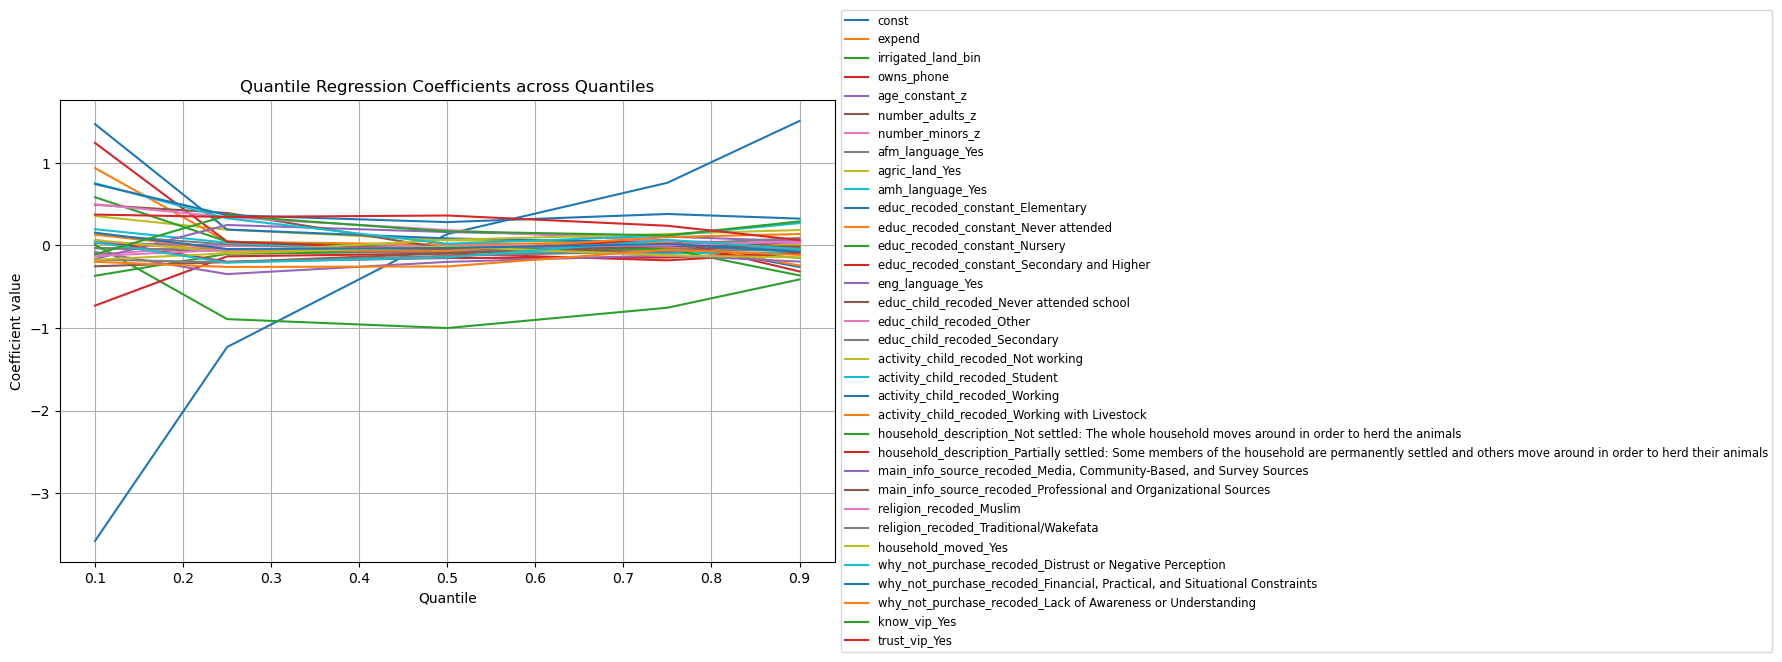

In [34]:
import matplotlib.pyplot as plt

# Plot coefficient paths across quantiles
coef_df = pd.DataFrame({q: qr_models[q].params for q in quantiles}).T
ax = coef_df.plot(figsize=(10, 6))

plt.title("Quantile Regression Coefficients across Quantiles")
plt.xlabel("Quantile")
plt.ylabel("Coefficient value")
plt.grid(True)

# Place legend outside the plot (right side)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')

plt.tight_layout()
plt.show()


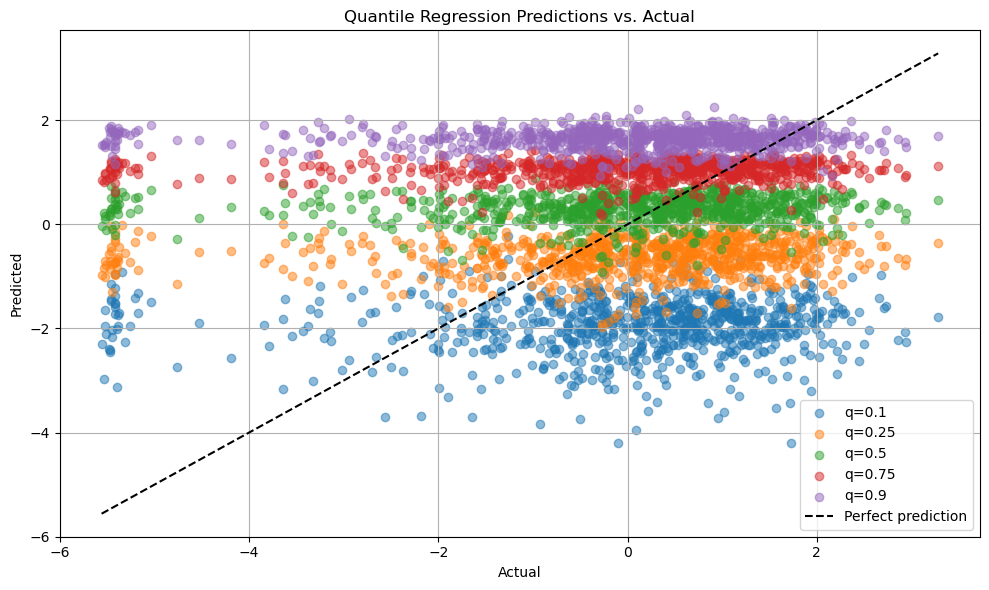

In [19]:
plt.figure(figsize=(10, 6))
for q in quantiles:
    plt.scatter(Y_cattle_TEST, qr_predictions[q], alpha=0.5, label=f'q={q}')
    
plt.plot([Y_cattle_TEST.min(), Y_cattle_TEST.max()],
         [Y_cattle_TEST.min(), Y_cattle_TEST.max()],
         'k--', label='Perfect prediction')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Quantile Regression Predictions vs. Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from catboost import CatBoostRegressor

# Example: Predicting 10th, 50th, and 90th quantile
quantiles = [0.1, 0.2,0.3,0.4, 0.5,0.6,0.7,0.8, 0.9]
catboost_models = {}
catboost_predictions = {}

for q in quantiles:
    model = CatBoostRegressor(
        loss_function=f'Quantile:alpha={q}',
        iterations=500,
        depth=10,
        learning_rate=0.01,
        verbose=0,
        random_seed=42
    )
    
    model.fit(X_cattle, Y_cattle)
    preds = model.predict(X_cattle_TEST)
    
    catboost_models[q] = model
    catboost_predictions[q] = preds


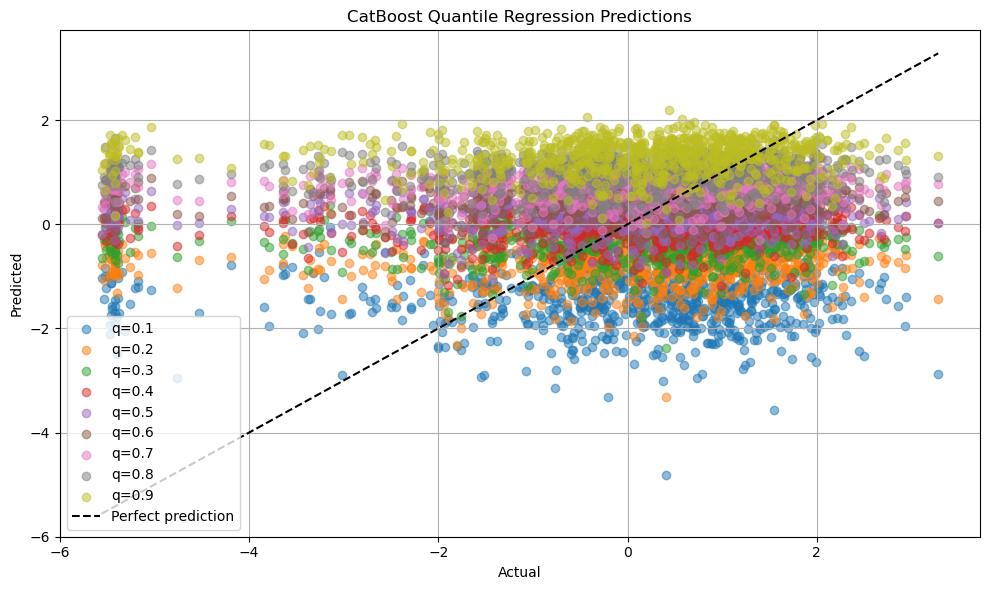

In [32]:
plt.figure(figsize=(10, 6))
for q in quantiles:
    plt.scatter(Y_cattle_TEST, catboost_predictions[q], label=f'q={q}', alpha=0.5)

plt.plot([Y_cattle_TEST.min(), Y_cattle_TEST.max()],
         [Y_cattle_TEST.min(), Y_cattle_TEST.max()],
         'k--', label="Perfect prediction")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("CatBoost Quantile Regression Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
# Initialize dictionary
importances_by_quantile = {}

# Extract feature importances per quantile
for q, model in catboost_models.items():
    importances_by_quantile[q] = model.get_feature_importance(prettified=False)

# Convert to DataFrame
importances_df = pd.DataFrame(importances_by_quantile, index=X_cattle.columns)

# Optional: sort by average importance across quantiles
importances_df['mean_importance'] = importances_df.mean(axis=1)
importances_df = importances_df.sort_values('mean_importance', ascending=False)

# Display
importances_df.drop(columns='mean_importance').round(2)


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
age_constant_z,12.87,15.40,16.10,14.31,13.09,14.32,15.31,15.82,12.74
number_minors_z,12.87,11.57,10.91,10.94,10.85,11.28,11.35,11.35,10.88
number_adults_z,9.89,11.21,9.86,10.10,10.37,10.03,10.98,10.92,10.64
owns_phone,4.17,2.84,3.44,3.55,3.50,4.25,4.21,3.67,3.39
why_not_purchase_recoded_Lack of Awareness or Understanding,4.35,3.07,4.30,4.28,3.48,4.24,2.80,2.73,2.95
"main_info_source_recoded_Media, Community-Based, and Survey Sources",1.69,3.05,4.40,3.95,3.47,3.51,3.51,4.12,4.11
main_info_source_recoded_Professional and Organizational Sources,4.37,3.47,3.23,3.16,2.96,2.81,2.64,2.63,1.67
household_description_Partially settled: Some members of the household are permanently settled and others move around in order to herd their animals,3.44,2.46,3.29,2.98,3.13,2.81,2.71,2.68,2.39
household_moved_Yes,2.14,3.42,2.97,3.26,2.04,2.68,2.59,3.17,2.77
religion_recoded_Traditional/Wakefata,3.85,2.58,2.06,2.47,2.69,2.75,2.59,2.15,3.16
